# Sales Prediction Dataset

The dataset provided contains information about the advertising expenditures of a company on various platforms (TV, Radio, newspapers) and the corresponding sales of a product.


Questions:

1. What is the average amount spent on TV advertising in the dataset?
2. What is the correlation between radio advertising expenditure and product sales?
3. Which advertising medium has the highest impact on sales based on the dataset?
4. Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.
5. How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?
6. How does the performance of the linear regression model change when the dataset is normalized?
7. What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?


Steps to do this analysis:

1. Load the dataset from advertising_sales_data.xlsx.
2. Compute the average TV advertising expenditure.
3. Determine the correlation between radio advertising and sales.
4. Identify the most impactful advertising medium.
5. Build a linear regression model using TV, Radio, and Newspaper to predict sales.
6. Predict sales for given advertising expenditures.
7. Compare model performance with and without normalization.
8. Assess the impact of using only radio and newspaper expenditures as predictors.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_excel("//content/advertising_sales_data.xlsx")

# Display the first few rows
display(df.head())

Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9

In [6]:
# 1. Average amount spent on TV advertising
average_tv_spending = df['TV'].mean()
print(f"Average TV advertising expenditure: ${average_tv_spending:.2f}")

Average TV advertising expenditure: $147.04


In [7]:
# 2. Correlation between Radio advertising and Sales
correlation_radio_sales = df[['Radio', 'Sales']].corr().iloc[0,1]
print(f"Correlation between Radio advertising and Sales: {correlation_radio_sales:.2f}")


Correlation between Radio advertising and Sales: 0.35


In [10]:
# 3. Identify the most impactful advertising medium
correlations = df.select_dtypes(include=np.number).corr()['Sales'].drop('Sales')
most_impactful = correlations.abs().idxmax()
print(f"Most impactful advertising medium: {most_impactful}")


Most impactful advertising medium: TV


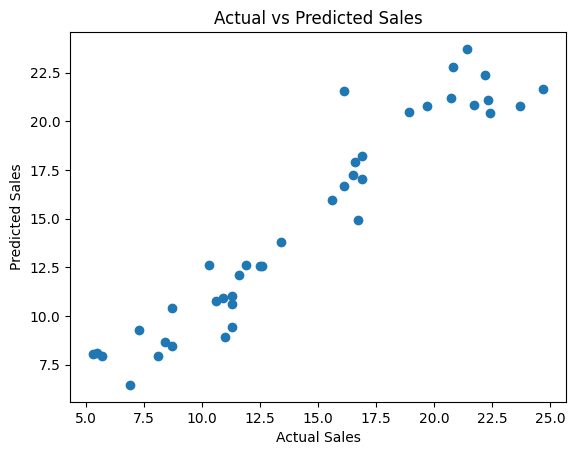

In [13]:
# 4. Linear Regression Model (TV, Radio, Newspaper -> Sales)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Impute missing values with the mean using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace NaN with mean of column
X = imputer.fit_transform(X) # Apply imputer to X

# Now proceed with train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [14]:
# 5. Predict sales for given advertising expenditures
new_data = np.array([[200, 40, 50]])
predicted_sales = model.predict(new_data)
print(f"Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: {predicted_sales[0]:.2f}")

Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: 19.87


In [15]:
# 6. Compare performance with normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

r2_original = r2_score(y_test, y_pred)
r2_scaled = r2_score(y_test, y_pred_scaled)
print(f"R² Score (Original): {r2_original:.2f}")
print(f"R² Score (Normalized): {r2_scaled:.2f}")

R² Score (Original): 0.91
R² Score (Normalized): 0.91


In [19]:
# 7. Impact of using only Radio and Newspaper as predictors
X_reduced = df[['Radio', 'Newspaper']]

# Impute missing values with the mean using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace NaN with mean of column
X_reduced = imputer.fit_transform(X_reduced) # Apply imputer to X_reduced

# Now proceed with train-test split and model training
X_train_r, X_test_r, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model_reduced = LinearRegression()
model_reduced.fit(X_train_r, y_train)
y_pred_r = model_reduced.predict(X_test_r)

r2_reduced = r2_score(y_test, y_pred_r)
print(f"R² Score using only Radio and Newspaper: {r2_reduced:.2f}")

R² Score using only Radio and Newspaper: 0.11
